In [9]:
pacman::p_load(tidyverse, reshape2, ggthemes, scales, plotly)
source('ggplot_theme_Publication-2.R')

In [2]:
df <- read.csv('MB2_TOPUP_MOBILE.csv', sep = "|")
df <- df %>% mutate_at(vars(contains('DATE')), ~(as.Date(., '%m/%d/%Y')))
head(df)

,CLIENT_NO,IB_REGISTERED_DATE2,TRAN_DATE,TRAN_AMOUNT
,<int>,<date>,<date>,<int>
1,190011,2012-11-21,2022-07-14,300000
2,190011,2012-11-21,2022-07-11,100000
3,190011,2012-11-21,2022-08-08,100000
4,190011,2012-11-21,2022-08-05,100000
5,190011,2012-11-21,2022-10-28,485000
6,190011,2012-11-21,2022-11-10,291000


In [3]:
model1_ls_10 <- read.csv('VIB20_CLIENT_FILE_FOR_TOPUP_28SEP.csv')
model1_ls_11 <- read.csv('VIB20_CLIENT_FILE_FOR_TOPUP_22_11_02.csv')

In [8]:
client_nos <- c((model1_ls_10 %>% select(CLIENT_NO))[,1], (model1_ls_11 %>% select(CLIENT_NO))[,1])
length(unique(client_nos))

[1] 38113

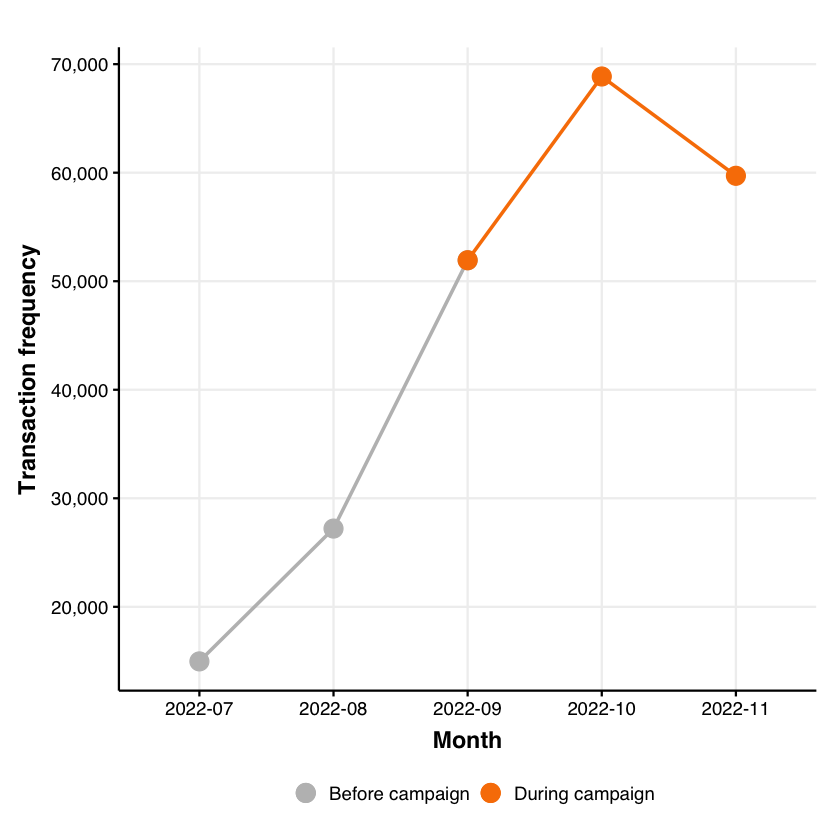

In [10]:
tmp <- df %>% filter(CLIENT_NO %in% client_nos) %>% mutate(TIME = format(TRAN_DATE, "%Y-%m")) %>%  
                group_by(TIME) %>% 
                summarise(ATF = n())
ggplot() + 
geom_line(data = tmp %>% filter(TIME %in% c('2022-07','2022-08','2022-09')), aes(x = TIME, y = ATF, group = 1, color = 'Before campaign'), size = 1) +
geom_point(data = tmp %>% filter(TIME %in% c('2022-07','2022-08','2022-09')), aes(x = TIME, y = ATF, group = 1, color = 'Before campaign'), size = 5) +
geom_line(data = tmp %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = ATF, group = 1, color = 'During campaign'), size = 1) +
geom_point(data = tmp %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = ATF, group = 1, color = 'During campaign'), size = 5) +
scale_y_continuous(labels = comma) +
labs(x = 'Month', y = 'Transaction frequency') +
theme_Publication() +
scale_color_manual(values = c('grey','#f87f01')) + 
theme(legend.title = element_blank())



`summarise()` has grouped output by 'TIME'. You can override using the `.groups` argument.



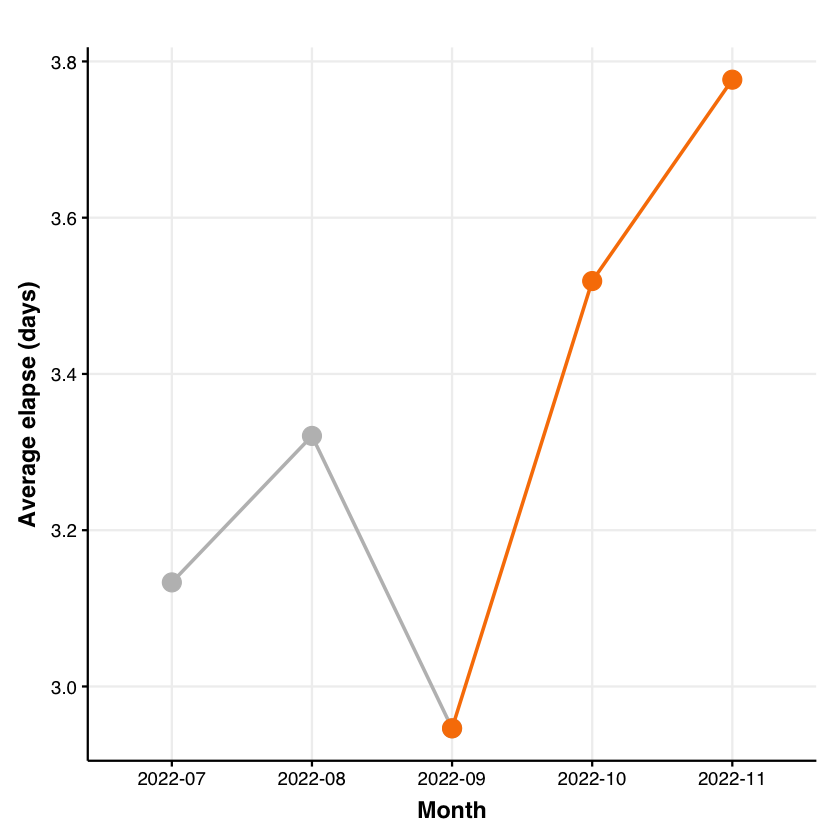

In [11]:
tmp_func <- function(vec) {
    if (length(vec) > 1){
        return(as.numeric(mean(diff(vec))))
    } else {
        return(0)
    }
}
tmp <- df %>% filter(CLIENT_NO %in% client_nos) %>% mutate(TIME = format(TRAN_DATE, "%Y-%m")) %>% 
        group_by(TIME,CLIENT_NO, TRAN_DATE) %>% 
        arrange(TRAN_DATE) %>% 
        group_by(TIME, CLIENT_NO) %>% 
        summarise(Dif = tmp_func(TRAN_DATE)) %>%
        group_by(TIME) %>%
        summarise(ADif = mean(Dif))
ggplot() + 
geom_line(data = tmp %>% filter(TIME %in% c('2022-07','2022-08','2022-09')), aes(x = TIME, y = ADif, group = 1, color = 'Before campaign'), size = 1) +
geom_point(data = tmp %>% filter(TIME %in% c('2022-07','2022-08','2022-09')), aes(x = TIME, y = ADif, group = 1, color = 'Before campaign'), size = 5) +
geom_line(data = tmp %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = ADif, group = 1, color = 'During campaign'), size = 1) +
geom_point(data = tmp %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = ADif, group = 1, color = 'During campaign'), size = 5) +
# geom_line(aes(x = TIME, y = ADif, group = 1, color = 'Avg'), size = 1) +
# geom_point(aes(x = TIME, y = ADif, group = 1, color = 'Avg'), size = 5) +
# geom_segment(aes(x = '2022-09', xend = '2022-09',y=-Inf, yend = max(ADif), color = 'Campaign Date'), linetype = 'dashed') +
# geom_text(aes(x = '2022-09', y = max(ADif) - 0.05, label = 'Campaign Date', color = 'Campaign Date'), hjust = 1) +
labs(x = 'Month', y = 'Average elapse (days)') +
theme_Publication() +
scale_color_manual(values = c('grey','#f87f01')) + 
theme(legend.position = 'none')

`summarise()` has grouped output by 'TIME'. You can override using the `.groups` argument.



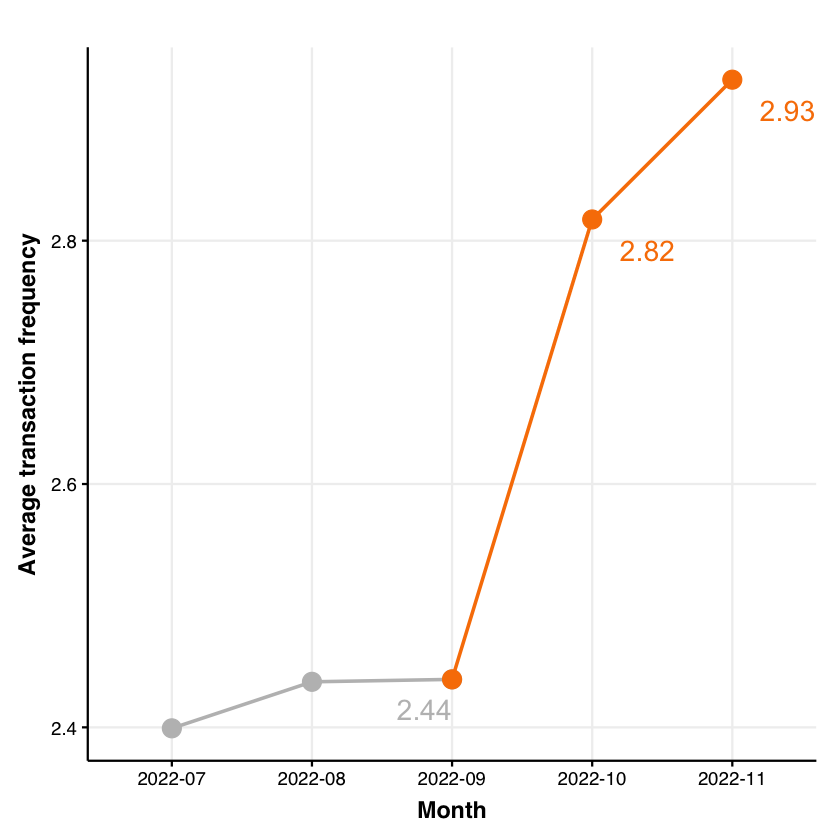

In [32]:
tmp <- df %>% filter(CLIENT_NO %in% client_nos) %>% mutate(TIME = format(TRAN_DATE, "%Y-%m")) %>%  group_by(TIME , CLIENT_NO) %>% summarise(n = n()) %>% group_by(TIME) %>% summarise(ATF = mean(n))
# ggplot(tmp) + 
ggplot() + 
geom_line(data = tmp %>% filter(TIME %in% c('2022-07','2022-08','2022-09')), aes(x = TIME, y = ATF, group = 1, color = 'Before campaign'), size = 1) +
geom_point(data = tmp %>% filter(TIME %in% c('2022-07','2022-08','2022-09')), aes(x = TIME, y = ATF, group = 1, color = 'Before campaign'), size = 5) +
geom_line(data = tmp %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = ATF, group = 1, color = 'During campaign'), size = 1) +
geom_point(data = tmp %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = ATF, group = 1, color = 'During campaign'), size = 5) +
geom_text(data = tmp %>% filter(TIME == '2022-09'), aes(x = '2022-09', y = ATF - 0.025, label = round(ATF,2), color = 'Before campaign'), hjust = 1, size = 6) +
geom_text(data = tmp %>% filter(TIME == '2022-10'), aes(x = '2022-10', y = ATF - 0.025, label = round(ATF,2), color = 'During campaign'), hjust = -0.5, size = 6) +
geom_text(data = tmp %>% filter(TIME == '2022-11'), aes(x = '2022-11', y = ATF - 0.025, label = round(ATF,2), color = 'During campaign'), hjust = -0.5, size = 6) +
# geom_line(aes(x = TIME, y = ATF, group = 1, color = 'Avg'), size = 1) +
# geom_point(aes(x = TIME, y = ATF, group = 1, color = 'Avg'), size = 5) +
# geom_segment(aes(x = '2022-09', xend = '2022-09',y=-Inf, yend = max(ATF), color = 'Campaign Date'), linetype = 'dashed') +
# geom_text(aes(x = '2022-09', y = max(ATF) - 0.05, label = 'Campaign Date', color = 'Campaign Date'), hjust = 1) +
labs(x = 'Month', y = 'Average transaction frequency') +
# scale_fill_Publication() + 
theme_Publication() +
scale_color_manual(values = c('grey','#f87f01')) + 
theme(legend.position = 'none')

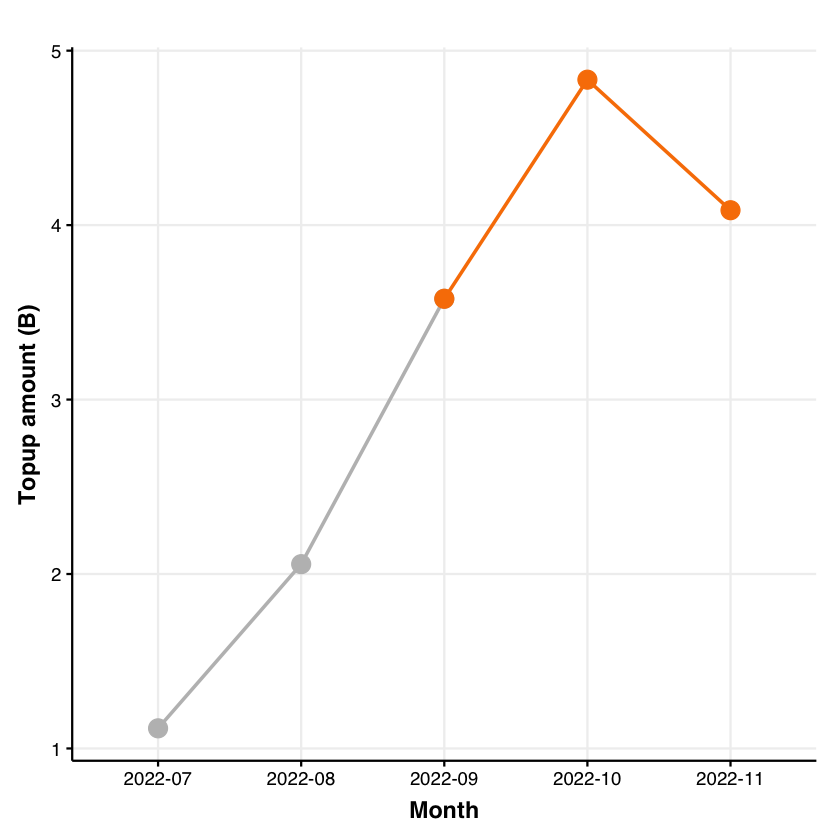

In [15]:
tmp <- df %>% filter(CLIENT_NO %in% client_nos) %>% mutate(TIME = format(TRAN_DATE, "%Y-%m")) %>%  
                group_by(TIME) %>% 
                summarise(ATF = sum(TRAN_AMOUNT)/10^9)
# ggplot(tmp) + 
ggplot() + 
geom_line(data = tmp %>% filter(TIME %in% c('2022-07','2022-08','2022-09')), aes(x = TIME, y = ATF, group = 1, color = 'Before campaign'), size = 1) +
geom_point(data = tmp %>% filter(TIME %in% c('2022-07','2022-08','2022-09')), aes(x = TIME, y = ATF, group = 1, color = 'Before campaign'), size = 5) +
geom_line(data = tmp %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = ATF, group = 1, color = 'During campaign'), size = 1) +
geom_point(data = tmp %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = ATF, group = 1, color = 'During campaign'), size = 5) +
# geom_line(aes(x = TIME, y = ATF, group = 1, color = 'Avg'), size = 1) +
# geom_point(aes(x = TIME, y = ATF, group = 1, color = 'Avg'), size = 5) +
# geom_segment(aes(x = '2022-09', xend = '2022-09',y=-Inf, yend = max(ATF), color = 'Campaign Date'), linetype = 'dashed') +
# geom_text(aes(x = '2022-09', y = max(ATF) - 0.05, label = 'Campaign Date', color = 'Campaign Date'), hjust = 1) +
labs(x = 'Month', y = 'Topup amount (B)') +
# scale_fill_Publication() + 
theme_Publication() +
scale_color_manual(values = c('grey','#f87f01')) + 
theme(legend.position = 'none')

`summarise()` has grouped output by 'TIME'. You can override using the `.groups` argument.



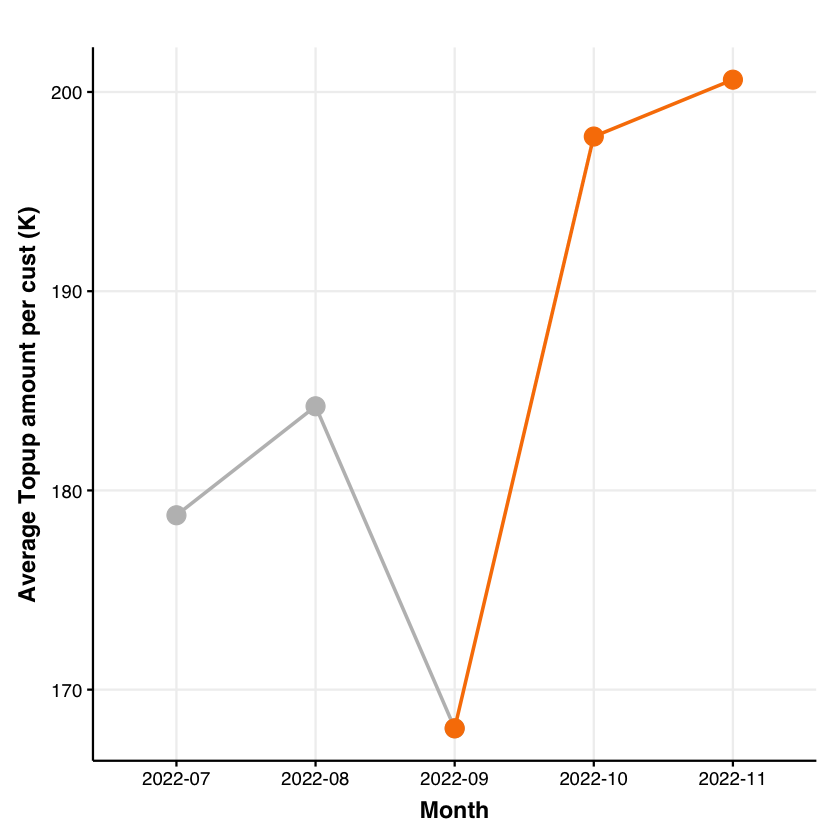

In [16]:
tmp <- df %>% filter(CLIENT_NO %in% client_nos) %>% mutate(TIME = format(TRAN_DATE, "%Y-%m")) %>%  group_by(TIME , CLIENT_NO) %>% summarise(n = sum(TRAN_AMOUNT)/10^3) %>% group_by(TIME) %>% summarise(ATF = mean(n))
# ggplot(tmp) + 
ggplot() + 
geom_line(data = tmp %>% filter(TIME %in% c('2022-07','2022-08','2022-09')), aes(x = TIME, y = ATF, group = 1, color = 'Before campaign'), size = 1) +
geom_point(data = tmp %>% filter(TIME %in% c('2022-07','2022-08','2022-09')), aes(x = TIME, y = ATF, group = 1, color = 'Before campaign'), size = 5) +
geom_line(data = tmp %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = ATF, group = 1, color = 'During campaign'), size = 1) +
geom_point(data = tmp %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = ATF, group = 1, color = 'During campaign'), size = 5) +
# geom_line(aes(x = TIME, y = ATF, group = 1, color = 'Avg'), size = 1) +
# geom_point(aes(x = TIME, y = ATF, group = 1, color = 'Avg'), size = 5) +
# geom_segment(aes(x = '2022-09', xend = '2022-09',y=-Inf, yend = max(ATF), color = 'Campaign Date'), linetype = 'dashed') +
# geom_text(aes(x = '2022-09', y = max(ATF), label = 'Campaign Date', color = 'Campaign Date'), hjust = 1) +
labs(x = 'Month', y = 'Average Topup amount per cust (K)') +
# scale_fill_Publication() + 
theme_Publication() +
scale_color_manual(values = c('grey','#f87f01')) + 
theme(legend.position = 'none')